# Data Analysis using StackOverFlow's survey data of 2021, 2022, 2023

## Introduction

For this project I decided to analyse StackOverFlow's survey data of 2021, 2022, 2023 found on https://insights.stackoverflow.com/survey using the CRISP-DM Process of:

    1. Business Understanding
    2. Data Understanding
    3. Prepare Data
    4. Data Modeling
    5. Evaluate the Results
    6. Deploy


## Bussiness Understanding

I am a coding lover. That's why I decided to analyse the incline in India towards programing languge for work and desirable viewpoint.

I will be tryin to find answers of the folowing

1. According to StackOverflow survey data, which Programing Language is the most used in India for working in the years 2021, 2022, 2023?
2. According to StackOverflow survey data, which Programing language is most corelated to other languages in India for the years 2021, 2022, 2023?
3. According to StackOverflow survey data, which are the most wanted Programing Language in India for the years 2021, 2022, 2023?

## Data Understanding: Exploratory Data Analysis

In [1]:
# import the necessary libraries 
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# to view all teh cols of the dataframe
pd.pandas.set_option('display.max_columns', None)

# for ignoring warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the dataSet
df_21 = pd.read_csv('2021/survey_results_public.csv')
df_22 = pd.read_csv('2022/survey_results_public.csv')
df_23 = pd.read_csv('2023/survey_results_public.csv')

In [3]:
#data exploration
df_21.head()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,YearsCodePro,DevType,OrgSize,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSys,NEWStuck,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,NEWOtherComms,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,NaN,"Developer, mobile",20 to 99 employees,EUR European Euro,4800.0,Monthly,C++;HTML/CSS;JavaScript;Objective-C;PHP;Swift,Swift,PostgreSQL;SQLite,SQLite,NaN,NaN,Laravel;Symfony,NaN,NaN,NaN,NaN,NaN,PHPStorm;Xcode,Atom;Xcode,MacOS,Call a coworker or friend;Visit Stack Overflow...,Stack Overflow,Multiple times per day,Yes,A few times per month or weekly,"Yes, definitely",No,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,NaN,NaN,NaN,NaN,NaN,NaN,JavaScript;Python,NaN,PostgreSQL,NaN,NaN,NaN,Angular;Flask;Vue.js,NaN,Cordova,NaN,Docker;Git;Yarn,Git,Android Studio;IntelliJ;Notepad++;PyCharm,NaN,Windows,Visit Stack Overflow;Google it,Stack Overflow,Daily or almost daily,Yes,Daily or almost daily,"Yes, definitely",No,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Assembly;C;Python;R;Rust,Julia;Python;Rust,SQLite,SQLite,Heroku,NaN,Flask,Flask,NumPy;Pandas;TensorFlow;Torch/PyTorch,Keras;NumPy;Pandas;TensorFlow;Torch/PyTorch,NaN,NaN,IPython/Jupyter;PyCharm;RStudio;Sublime Text;V...,IPython/Jupyter;RStudio;Sublime Text;Visual St...,MacOS,Visit Stack Overflow;Google it;Watch help / tu...,Stack Overflow;Stack Exchange,Multiple times per day,Yes,Multiple times per day,"Yes, definitely",Yes,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,NaN,"Developer, front-end",100 to 499 employees,EUR European Euro,NaN,Monthly,JavaScript;TypeScript,JavaScript;TypeScript,NaN,NaN,NaN,NaN,Angular;jQuery,Angular;jQuery,NaN,NaN,NaN,NaN,NaN,NaN,Windows,Call a coworker or friend;Visit Stack Overflow...,Stack Overflow,Daily or almost daily,Yes,Daily or almost daily,Neutral,No,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,10,"Developer, desktop or enterprise applications;...","Just me - I am a freelancer, sole proprietor, ...",GBP\tPound sterling,NaN,NaN,Bash/Shell;HTML/CSS;Python;SQL,Bash/Shell;HTML/CSS;Python;SQL,Elasticsearch;PostgreSQL;Redis,Cassandra;Elasticsearch;PostgreSQL;Redis,Na

In [4]:
df_22.head(1)

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,Country,Currency,CompTotal,CompFreq,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysProfessional use,OpSysPersonal use,VersionControlSystem,VCInteraction,VCHostingPersonal use,VCHostingProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,Blockchain,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_23.head(4)

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,18,9,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,I have a great deal of influence,Investigate,Start a free trial;Ask developers I know/work ...,United States of America,USD\tUnited States dollar,285000.0,HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,Supabase,Firebase Realtime Database;Supabase,Amazon Web Services (AWS);Netlify;Vercel,Fly.io;Netlify;Render,Next.js;React;Remix;Vue.js,Deno;Elm;Nuxt.js;React;Svelte;Vue.js,Electron;React Native;Tauri,Capacitor;Electron;Tauri;Uno Platform;Xamarin,Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn,Godot;npm;pnpm;Unity 3D;Unreal Engine;Vite;Web...,Vim;Visual Studio Code,Vim;Visual Studio Code,iOS;iPadOS;MacOS;Windows;Windows Subsystem for...,MacOS;Windows;Windows Subsystem for Linux (WSL),Asana;Basecamp;GitHub Discussions;Jira;Linear;...,GitHub Discussions;Linear;Notion;Trello,Cisco Webex Teams;Discord;Google Chat;Google M...,Discord;Signal;Slack;Zoom,ChatGPT,ChatGPT;Neeva AI,GitHub Copilot,GitHub Copilot,Stack Overflow;Stack Exchange,Daily or almost daily,Yes,A few times per month or weekly,"Yes, definitely","I don't think it's super necessary, but I thin...",Yes,Indifferent,Other (please explain),Somewhat distrust,Learning about a codebase;Writing code;Debuggi...,Writing code;Committing and reviewing code,NaN,NaN,NaN,NaN,NaN,NaN,Yes,People manager,10.0,Strongly agree,Agree,Strongly agree,Agree,Agree,Agree,Agree,Strongly agree,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,NaN,27,23,"Developer, back-end

# Que 1: According to StackOverflow survey data, which Programing Language is the most used in India for working in the years 2021, 2022, 2023?

#### Data Prepration

In [6]:
# Filtering only India Data
def only_India(df): 
    '''
    Filter a dataframe by country India(drop all other countries excpet India)
    Returns filtred dataframe
    '''
    
    temp = df
    
    for col in ['LanguageHaveWorkedWith', 'LanguageWantToWorkWith']: 
        temp = temp[temp['Country'] == 'India'].dropna(subset=[col])
        
    return temp


# Filtering the dataframe 
india_only_2021 = only_India(df_21)
india_only_2022 = only_India(df_22)
india_only_2023 = only_India(df_23)


In [7]:
# Splitting the languages column and returning the combined list for particular column 
def split_col(df, col):
    '''
    Splits the data on the basis of Delimeter= ';'
    And append languages into a simple list,
    Returns the df and list
    '''
    temp = df[col].apply(lambda x: x.split(';'))
    
    li = []
    for row in temp:
        for item in row:
            li.append(item.strip())
    
    return temp, li

# Splitting the dataframe by cols and getting the list.
wanted_lan_2021, list_wanted_lan_2021 = split_col(india_only_2021, 'LanguageHaveWorkedWith')
worked_lan_2021, list_worked_lan_2021 = split_col(india_only_2021, 'LanguageWantToWorkWith')

wanted_lan_2022, list_wanted_lan_2022 = split_col(india_only_2022, 'LanguageHaveWorkedWith')
worked_lan_2022, list_worked_lan_2022 = split_col(india_only_2022, 'LanguageWantToWorkWith')

wanted_lan_2023, list_wanted_lan_2023 = split_col(india_only_2023, 'LanguageHaveWorkedWith')
worked_lan_2023, list_worked_lan_2023 = split_col(india_only_2023, 'LanguageWantToWorkWith')


In [8]:
def group_count(data_list, year):
    '''
    Group data by count
    Return the result as dictionary
    '''
    li = dict(Counter(data_list))
    li_dict = [{'Programming Language':key, 'Count': value, 'Year': year} for key, value in li.items()]
    return li_dict


# getting dictionary after grouping the list
dict_wanted_lan_2021 = group_count(list_wanted_lan_2021, '2021')
dict_worked_lan_2021 = group_count(list_worked_lan_2021, '2021')

dict_wanted_lan_2022 = group_count(list_wanted_lan_2022, '2022')
dict_worked_lan_2022 = group_count(list_worked_lan_2022, '2022')

dict_wanted_lan_2023 = group_count(list_wanted_lan_2023, '2023')
dict_worked_lan_2023 = group_count(list_worked_lan_2023, '2023')

#### Modeling

In [9]:
#combining data
wanted_lan = pd.DataFrame(dict_wanted_lan_2021 + dict_wanted_lan_2022 + dict_wanted_lan_2023)
worked_lan = pd.DataFrame(dict_worked_lan_2021 + dict_worked_lan_2022 + dict_worked_lan_2023)

In [10]:
# Finding and adding percentage to the dataframe
def per(df, col):
    '''
    Finds percentage for each language and,
    returns the result
    '''
    li = []
    res = pd.Series()
    
    for item in df[col].unique():
        li.append(df[df[col] == item]['Count'] / df[df[col] == item]['Count'].sum())
    
    
    for item in li:
        res = res.append(item)
        
    return res

wanted_lan['Percentage'] = per(wanted_lan, 'Year')
worked_lan['Percentage'] = per(worked_lan, 'Year')

In [18]:
# Ordering on the basis of percentage(desc) and keeping from top 12
top_wanted = wanted_lan[wanted_lan['Programming Language'].isin(wanted_lan.sort_values(by=['Percentage'], ascending=False).head(12)['Programming Language'].unique())].sort_values(by='Percentage', ascending=False)

top_worked = worked_lan[worked_lan['Programming Language'].isin(worked_lan.sort_values(by=['Percentage'], ascending=False).head(12)['Programming Language'].unique())].sort_values(by='Percentage', ascending=False)


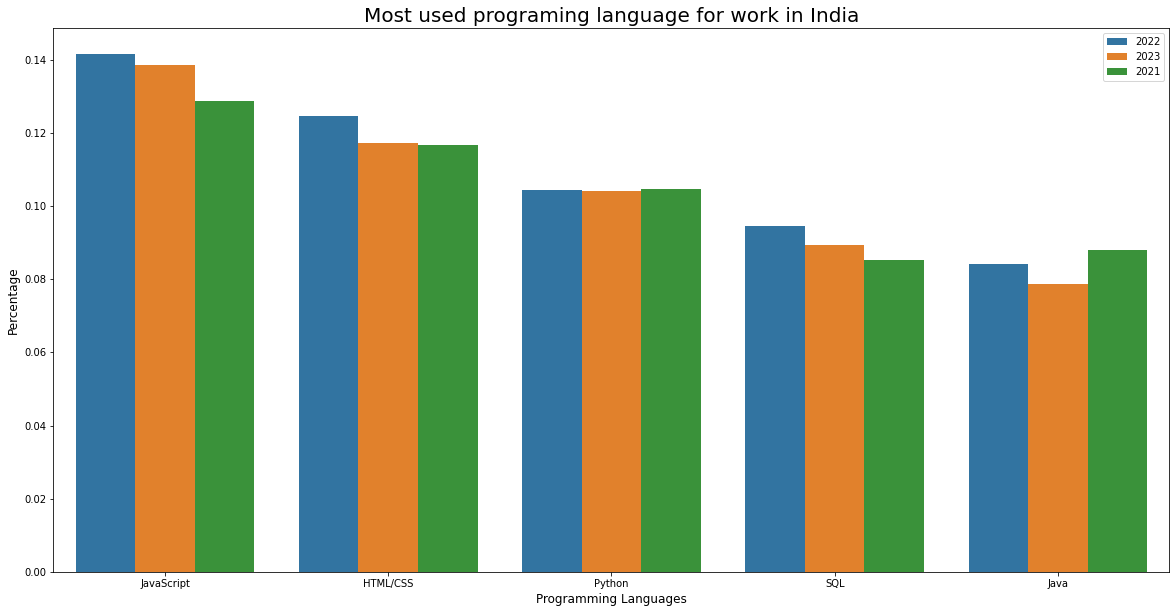

In [37]:
plt.figure(figsize=(20, 10))
sns.barplot(x = 'Programming Language', y = 'Percentage', hue = 'Year', data = top_wanted)

plt.xlabel("Programming Languages", fontsize = 12)
plt.ylabel("Percentage", fontsize = 12)
plt.legend(title_fontsize='50')
plt.title('Most used programing language for work in India', size = 20)
plt.show()

### Results

* The most used language is JavaScript, theres a steady increase in its usgae from 2021 to 2023
* Share of Python is almost similar for the three assesment years
* Share of SQL is declining.

# Que 2: According to StackOverflow survey data, which Programing language is most corelated to other languages in India for the years 2021, 2022, 2023?

#### Data Prepration

In [33]:
li = []
for j in list(zip(wanted_lan_2023, worked_lan_2023)):
    for i in j[0]:
        li.append({
            'pl_worked': i, 
            'pl_wanted': Counter(j[0])
        })
        
transition = pd.DataFrame(li).groupby('pl_worked').agg({'pl_wanted': 'sum'}).reset_index()

In [34]:
for item in transition['pl_worked']:
    transition[item] = 0

for index, item in transition.iterrows():
    total = sum([value for key, value in dict(item['pl_wanted']).items()])
    for key, value in dict(item['pl_wanted']).items():
         transition[key].loc[index] = (value / total)

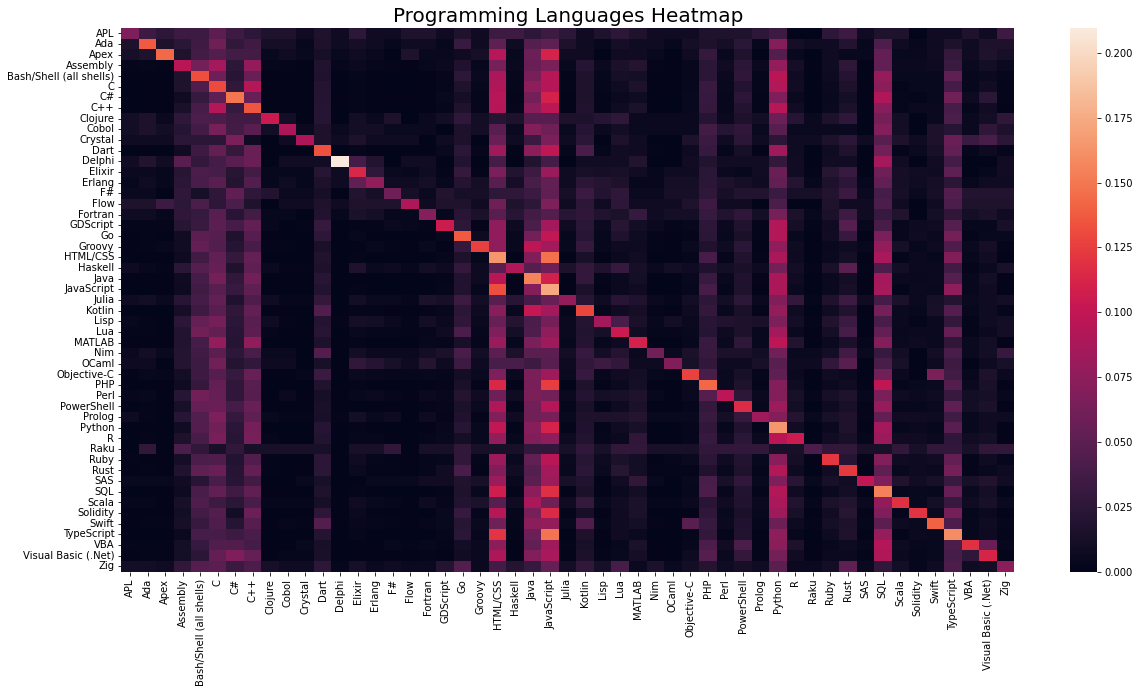

In [36]:
trans_plt = transition.drop('pl_wanted', axis=1).set_index('pl_worked')

plt.figure(figsize=(20, 10))
sns.heatmap(trans_plt)
plt.title('Programming Languages Heatmap', size = 20)
plt.ylabel('')
plt.show()

### Results 

* `JavaScript` and `HTML\CSS` are highly corelated with other programing languages
* Around 27 Programming Language have nearly no correlation among them with anyone
* `JavaScript` has strongest corelation with `HTML\CSS`

## Que 3: According to StackOverflow survey data, which are the most wanted Programing Language in India for the years 2021, 2022, 2023?

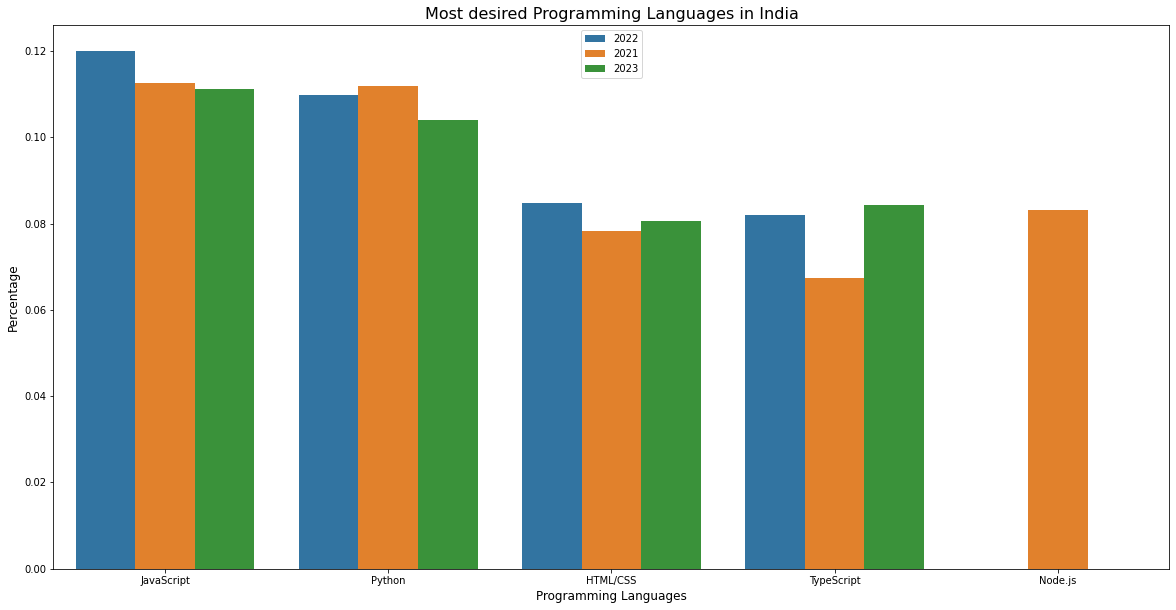

In [39]:
plt.figure(figsize=(20,10))
sns.barplot(x = 'Programming Language', y = 'Percentage', hue = 'Year', data = top_worked)

plt.title('Most desired Programming Languages in India', size = 16)
plt.xlabel("Programming Languages", fontsize = 12)
plt.ylabel("Percentage", fontsize = 12)
plt.legend(title_fontsize='40')
plt.show()

### Results

* Top three of here (wanted) is same as top three of (worked), this shows many people wants to learn language which is used in work